## Vincent Roy
**ID : 119244546**

In [799]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import *

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV, Lasso


from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import scale

from sklearn.model_selection import cross_val_score, cross_val_predict

import graphviz

import scipy.stats  as ss

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

### Step 1 - Load the data

In [800]:
filename = 'assignment04_b.csv'
data = pd.read_csv(filename,encoding = "ISO-8859-1")

### Step 2 - Describe the data

In [801]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [802]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.320132,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.592299,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [803]:
# create a onehot_encoder object that will trnasform a categorical column to a series of binary columns
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')

In [804]:
# transform the cp column

# get the column cp and drop it from the dataframe
cp = data['cp'].values.reshape(-1, 1)
data = data.drop(labels=['cp'],axis=1)

# convert the categories into binary columns
onehot_cp = onehot_encoder.fit_transform(cp);

# add back into the dataframe the cp converted data
data = pd.concat([data,pd.DataFrame(onehot_cp,columns=['cp0','cp1','cp2','cp3'])],axis=1)
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp0,cp1,cp2,cp3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0.0,0.0,0.0,1.0
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0.0,0.0,1.0,0.0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0.0,1.0,0.0,0.0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1.0,0.0,0.0,0.0


In [805]:
# transform the restecg column

# get the column restecg and drop it from the dataframe
restecg = data['restecg'].values.reshape(-1, 1)
data = data.drop(labels=['restecg'],axis=1)

# convert the categories into binary columns
onehot_restecg = onehot_encoder.fit_transform(restecg);

# add back into the dataframe the restecg converted data
data = pd.concat([data,pd.DataFrame(onehot_restecg,columns=['rest0','rest1','rest2'])],axis=1)
data.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp0,cp1,cp2,cp3,rest0,rest1,rest2
0,63,1,145,233,1,150,0,2.3,0,0,1,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [806]:
# transform the slope column

# get the column slope and drop it from the dataframe
slope = data['slope'].values.reshape(-1, 1)
data = data.drop(labels=['slope'],axis=1)

# convert the categories into binary columns
onehot_slope = onehot_encoder.fit_transform(slope);

# add back into the dataframe the slope converted data
data = pd.concat([data,pd.DataFrame(onehot_slope,columns=['slope0','slope1','slope2'])],axis=1)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,cp0,cp1,cp2,cp3,rest0,rest1,rest2,slope0,slope1,slope2
0,63,1,145,233,1,150,0,2.3,0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,41,0,130,204,0,172,0,1.4,0,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [807]:
# transform the thal column

# get the thal column and drop it from the dataframe
thal = data['thal'].values.reshape(-1, 1)
data = data.drop(labels=['thal'],axis=1)

# convert the categories into binary columns
onehot_thal = onehot_encoder.fit_transform(thal);

# add back into the dataframe the thal converted data
data = pd.concat([data,pd.DataFrame(onehot_thal,columns=['thal0','thal1','thal2'])],axis=1)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp3,rest0,rest1,rest2,slope0,slope1,slope2,thal0,thal1,thal2
0,63,1,145,233,1,150,0,2.3,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,56,1,120,236,0,178,0,0.8,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,57,0,120,354,0,163,1,0.6,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [808]:
data.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp3,rest0,rest1,rest2,slope0,slope1,slope2,thal0,thal1,thal2
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.729373,0.544554,...,0.075908,0.485149,0.501650,0.013201,0.069307,0.462046,0.468647,0.066007,0.547855,0.386139
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,1.022606,0.498835,...,0.265288,0.500606,0.500824,0.114325,0.254395,0.499382,0.499842,0.248704,0.498528,0.487668
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [809]:
cor = data.corr()


<Figure size 360x360 with 0 Axes>

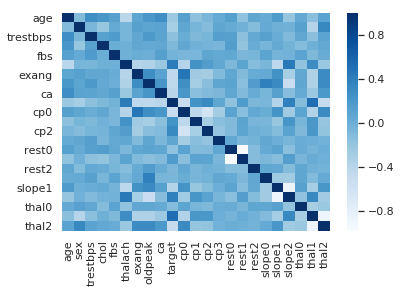

In [810]:
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
sns.heatmap(cor,cmap="Blues")


In [811]:
corTarget = cor['target'].abs()

corTarget = corTarget.drop(labels='target',axis=0)

corTarget = corTarget.sort_values(ascending=False)

corTarget = pd.DataFrame(corTarget)



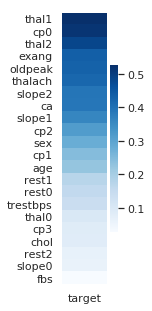

In [812]:

plt.figure(figsize=(1,5));
sns.heatmap(corTarget,cmap="Blues");



TypeError: only size-1 arrays can be converted to Python scalars

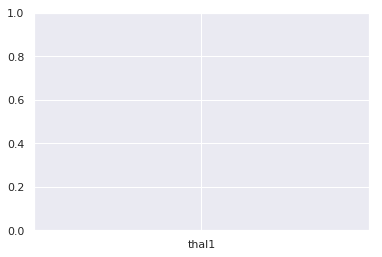

In [848]:
plt.bar(corTarget.index, corTarget)
plt.xticks(rotation='vertical')
plt.tight_layout();

In [ ]:
top6vars = corTarget.head(6).index

In [ ]:
data0 = data[data['target'] == 0]
data1 = data[data['target'] == 1]

In [ ]:
def boxComp(variable):
    
    fig = plt.figure()
    fig.suptitle(variable, fontsize=16)
 
    delta = data[variable].max() - data[variable].min()
    
    min = data[variable].min() - delta*0.1
    max = data[variable].max() + delta*0.1
    
    plt.subplot(2,3,1)
    plt.boxplot(data[variable])
    plt.ylim(min,max)
    plt.xlabel('All');
    
    plt.subplot(2,3,2)
    plt.boxplot(data0[variable]);
    plt.xlabel('No disease');
    plt.ylim(min,max)
    
    plt.subplot(2,3,3)
    plt.boxplot(data1[variable]);
    plt.ylim(min,max)
    plt.xlabel('Disease');
    
    
    plt.subplot(2,3,4)
    plt.hist(data[variable]);
    
    
    plt.subplot(2,3,5)
    plt.hist(data0[variable]);
    
    
    plt.subplot(2,3,6)
    plt.hist(data1[variable]);
    
    plt.tight_layout();
    
      

In [ ]:
for i in top6vars:
    
    boxComp(i)

In [814]:
# drop the unnecessary dummy variables
data = data.drop(labels=['cp3'],axis=1)
data = data.drop(labels=['rest2'],axis=1)
data = data.drop(labels=['slope2'],axis=1)
data = data.drop(labels=['thal2'],axis=1)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp0,cp1,cp2,rest0,rest1,slope0,slope1,thal0,thal1
0,63,1,145,233,1,150,0,2.3,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,1,130,250,0,187,0,3.5,0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [815]:
# get the target column and drop it from the dataframe
y = data['target'].values
data = data.drop(labels=['target'],axis=1)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp0,cp1,cp2,rest0,rest1,slope0,slope1,thal0,thal1
0,63,1,145,233,1,150,0,2.3,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,1,130,250,0,187,0,3.5,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [816]:
colNames = data.columns.values

In [817]:
# get the feature values from the dataframe
X = data.values

In [818]:
# min max scale the values of the features from 0 to 1
#minMaxX = MinMaxScaler()
#X = minMaxX.fit_transform(X)

stdX = StandardScaler()
X = stdX.fit_transform(X)


In [819]:
# create differnt values for the regularization constant
cValues = np.linspace(0.5, 0.001, num=200)

In [820]:
# create an empty data frame  store the results
results = pd.DataFrame(columns=['CValue','AvgPrecision'])

for c in cValues:

    # create the LDA model
    model = LogisticRegression(penalty='l1',C=c,solver='liblinear');

    scores = cross_val_score(model, X, y,scoring='average_precision', cv=10)

    avgPrecision = scores.mean()
    
    # add the results of the model
    results = results.append({'CValue':c,'AvgPrecision':avgPrecision},ignore_index=True)
    

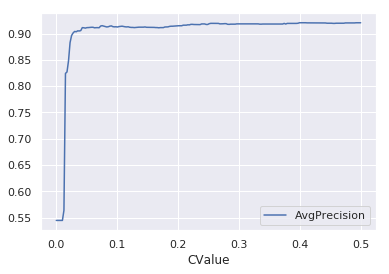

In [821]:
results.plot('CValue','AvgPrecision');

In [822]:
results.head()

,CValue,AvgPrecision
0,0.500000,0.920449
1,0.497492,0.920449
2,0.494985,0.920449
3,0.492477,0.920449
4,0.489970,0.920147


In [823]:
# create the LDA model
model = LogisticRegression(penalty='l1',C=0.05,solver='liblinear');

t = model.fit(X,y)
coef = t.coef_
coef = coef.round(decimals=1)
coef = pd.DataFrame(coef,columns=colNames)

coef = coef.transpose()
coef = coef.abs() + 0
coef = coef.sort_values(by=0,ascending=False)
coef.columns = ['beta']
coef

coef.values[:,0]

array([0.5, 0.5, 0.3, 0.3, 0.2, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. ])

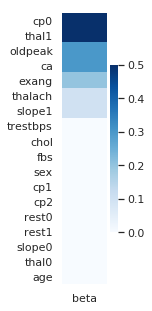

In [824]:
plt.figure(figsize=(1,5));
sns.heatmap(coef,cmap="Blues");

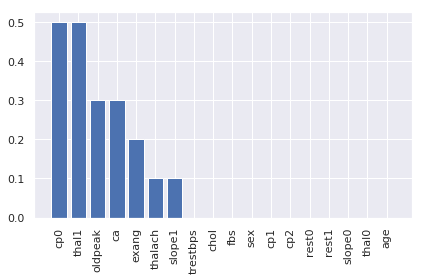

In [825]:
plt.bar(coef.index, coef.values[:,0])
plt.xticks(rotation='vertical')
plt.tight_layout();

In [835]:
tree = DecisionTreeClassifier(max_depth = 3)
bag = BaggingClassifier(tree, n_estimators=100,random_state=1)

scores = cross_val_score(bag, X, y,scoring='average_precision', cv=10)

avgPrecision = scores.mean()

In [836]:
avgPrecision

0.9148226495740183

In [846]:
tree.fit(X,y)

export_graphviz(tree,out_file = "bag.dot", feature_names = data.columns)

with open("bag.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


from IPython.display import Image
from sklearn.externals.six import StringIO  
import pydotplus

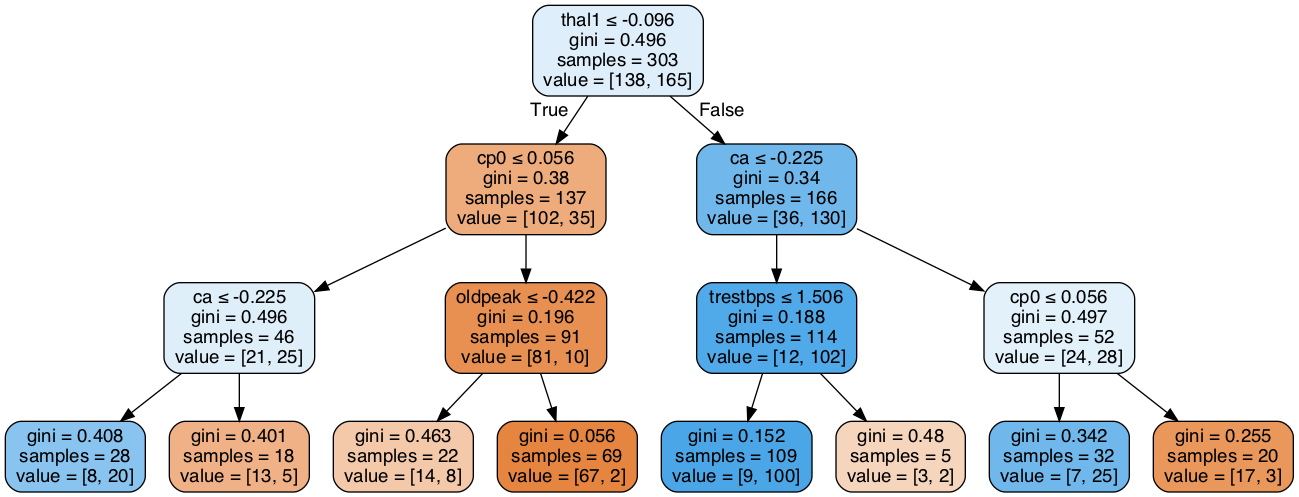

In [849]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, feature_names = data.columns,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())